In [3]:
# Importa bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from math import *
from scipy.integrate import odeint

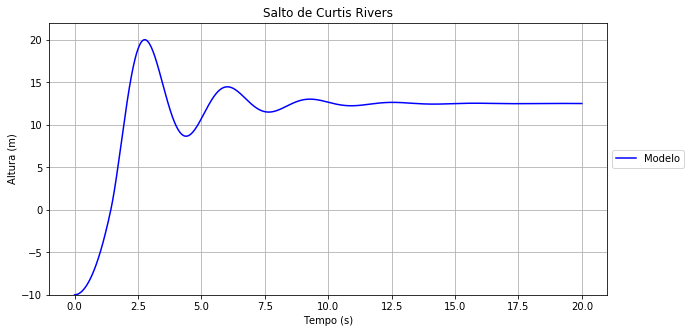

A CORDA ESTICOU 20.032939241824387 METROS


In [5]:
# Implementação do nosso bungee jumping

# Parâmetros do nosso modelo
g = 9.8 # Aceleração da gravidade, em m/s2
m = 90 # Massa da pessoa, em kg
𝜌 = 0.8 # Densidade do ar, em kg/m3
Cd = 0.5
h = 1.70 # Altura da pessoa
A = (m*h)/3600 # Área da secção transversal da pessoa
l0 = 10 # Comprimento inicial da corda
vt = 54 # Velocidade terminal do corpo humano em m/s

# Condições iniciais
y = -10
vy = 0

# Listas que serão usadas no ODEINT
dt = 1e-3
ls_tempo = np.arange(0, 20, dt)
cond_inicial = [y,vy]

# Damping
D = 74

# Função que implementa o nosso modelo
def modelo(X,t):
    y = X[0]
    vy = X[1]
    x = (y-l0)
    Ar = (0.5*𝜌*Cd*A*vy**2)
    k = 350
    dhdt = vy
    if y < 0:
        dvydt = g - Ar/m
    else:
        dvydt = g - Ar/m - (k*x)/m - (D*vy)/m
    derivadas = [dhdt,dvydt]
    return derivadas

# Resultado do ODEINT
result = odeint(modelo,cond_inicial,ls_tempo)
h = result[:,0]

# Plotando gráfico do modelo
fig = plt.figure(figsize=(10,5))
plt.title("Salto de Curtis Rivers")
ax = fig.add_subplot(111)
plt.plot(ls_tempo,h, 'b-', label="Modelo")
plt.xlabel("Tempo (s)")
plt.ylabel("Altura (m)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
ax.set_ylim(-10, 22)
plt.show()

stretch = max(h)
print('A CORDA ESTICOU {0} METROS'.format(stretch))

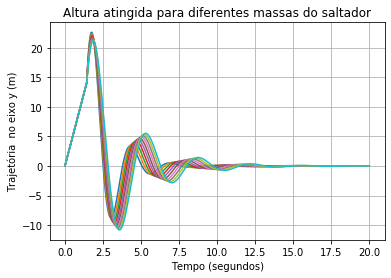

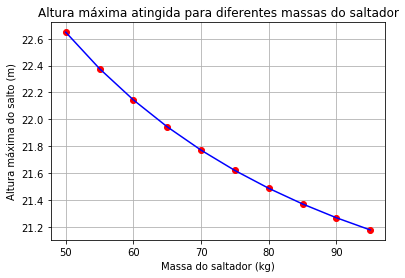

In [6]:
# Gráfico conclusivo e pergunta a ser respondida pelo modelo
# Qual a altura máxima atinginda no salto para diferentes valores de massa do saltador?

#Declara a lista de  massas
lista_massas = np.arange(50, 100, 5)

def modelo1(X, t, m):
    y = X[0]
    vy = X[1]
    x = (y-l0)
    Ar = (0.5*𝜌*Cd*A*vy**2)
    k = 330
    dhdt = vy
    if y < 0:
        dvydt = g - Ar/m
    else:
        dvydt = g - Ar/m - (k*x)/m - (D*vy)/m
    derivadas = [dhdt,dvydt]
    return derivadas
ls_max = []
for massa in lista_massas:
    Solucao = odeint(modelo1,cond_inicial, ls_tempo, args=(massa,))    
    ls_max.append(max(Solucao[:,1]))
    plt.plot(ls_tempo, Solucao[:,1])
    
plt.title('Altura atingida para diferentes massas do saltador')
#plt.axis([0, 8, 0, 37])
plt.xlabel('Tempo (segundos)')
plt.ylabel('Trajetória  no eixo y (m)')
plt.grid(True)
plt.show()
    
#Gráfico conclusivo
plt.title('Altura máxima atingida para diferentes massas do saltador')   
plt.plot(lista_massas,ls_max, 'ro')
plt.plot(lista_massas,ls_max, 'b')
plt.xlabel('Massa do saltador (kg)')
plt.ylabel('Altura máxima do salto (m)')
plt.grid(True)
plt.show()